In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.fft import fft2, ifft2
import torchvision
import torchvision.transforms as T
from torchvision import io
from torch.utils.data import Dataset, DataLoader

import os
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import numpy as np

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
!rm DeconvModels.py
!rm training_functions.py
!rm blur_functions.py
!wget https://raw.githubusercontent.com/viibrem/ml_masters_uct/master/PyTorch/Models/DeconvModels.py -q
!wget https://raw.githubusercontent.com/viibrem/ml_masters_uct/master/PyTorch/util/training_functions.py -q
!wget https://raw.githubusercontent.com/viibrem/ml_masters_uct/master/PyTorch/util/blur_functions.py -q
from DeconvModels import Deconv2D
from training_functions import train_regression_model, train_classification_model
import blur_functions as blur

In [54]:
class ImageDataset(Dataset):
    def __init__(self, ds_path):
        self.ds_path = ds_path

        y_imgs = os.listdir(f'{ds_path}/LR_bicubic_X2')[:20]

        self.y_paths = list(map(lambda img_path: f'{ds_path}/LR_bicubic_X2/{img_path}', y_imgs))

    
    def __len__(self):
        return len(self.y_paths)


    def __getitem__(self, idx):
        y_path = self.y_paths[idx]

        # x_img = io.read_image(x_path, io.ImageReadMode.GRAY)
        y_img = io.read_image(y_path, io.ImageReadMode.GRAY)

        SIZE = 128
        # PAD_SIZE = SIZE//4
        PAD_SIZE = 0

        # Preprocess image
        y_img = T.Resize((SIZE, SIZE))(y_img)
        y_img = y_img / 255.0
        y_img = nn.functional.pad(y_img, (PAD_SIZE, PAD_SIZE, PAD_SIZE, PAD_SIZE))

        # Preprocess image
        x_img = blur.avg_blur_image(y_img, 3)

        return x_img, y_img

In [52]:
from google.colab import drive
drive.mount('/content/drive')
base_path = '/content/drive/MyDrive/data/DIV2K/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
data = ImageDataset(base_path)
dataloader = DataLoader(data, batch_size=8, shuffle=False)

In [56]:
x_img, y_img = next(iter(dataloader))
x_img.size(), y_img.size()

(torch.Size([8, 1, 128, 128]), torch.Size([8, 1, 128, 128]))

In [57]:
class DNN(nn.Module):
    def __init__(self, shape):
        super(DNN, self).__init__()
        self.deconv = Deconv2D(shape)
        self.w = nn.Parameter(data=torch.tensor([0.5]), requires_grad=True)
    
    def forward(self, x):
        x = self.deconv(x)
        x = self.w * x
        return x

In [58]:
model = DNN((4,4))

In [59]:
# model = Deconv2D((6, 6))

model = model.to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [60]:
history = train_regression_model(model, criterion, optimizer, dataloader, num_epochs=500)

100%|██████████| 3/3 [00:01<00:00,  2.00it/s]


Epoch 0001 loss: 0.19368


100%|██████████| 3/3 [00:01<00:00,  2.91it/s]


Epoch 0002 loss: 0.12969


100%|██████████| 3/3 [00:00<00:00,  3.10it/s]


Epoch 0003 loss: 0.07334


100%|██████████| 3/3 [00:00<00:00,  3.05it/s]


Epoch 0004 loss: 0.04132


100%|██████████| 3/3 [00:00<00:00,  3.89it/s]


Epoch 0005 loss: 0.04740


100%|██████████| 3/3 [00:00<00:00,  4.53it/s]


Epoch 0006 loss: 0.05950


100%|██████████| 3/3 [00:00<00:00,  4.43it/s]


Epoch 0007 loss: 0.04873


100%|██████████| 3/3 [00:00<00:00,  4.37it/s]


Epoch 0008 loss: 0.03875


100%|██████████| 3/3 [00:00<00:00,  4.42it/s]


Epoch 0009 loss: 0.03936


100%|██████████| 3/3 [00:00<00:00,  4.38it/s]


Epoch 0010 loss: 0.04257


100%|██████████| 3/3 [00:00<00:00,  4.40it/s]


Epoch 0011 loss: 0.04248


100%|██████████| 3/3 [00:00<00:00,  4.40it/s]


Epoch 0012 loss: 0.03971


100%|██████████| 3/3 [00:00<00:00,  4.34it/s]


Epoch 0013 loss: 0.03769


100%|██████████| 3/3 [00:00<00:00,  4.39it/s]


Epoch 0014 loss: 0.03803


100%|██████████| 3/3 [00:00<00:00,  4.38it/s]


Epoch 0015 loss: 0.03880


100%|██████████| 3/3 [00:00<00:00,  4.53it/s]


Epoch 0016 loss: 0.03826


100%|██████████| 3/3 [00:00<00:00,  4.44it/s]


Epoch 0017 loss: 0.03748


100%|██████████| 3/3 [00:00<00:00,  4.41it/s]


Epoch 0018 loss: 0.03747


100%|██████████| 3/3 [00:00<00:00,  3.99it/s]


Epoch 0019 loss: 0.03768


100%|██████████| 3/3 [00:00<00:00,  3.06it/s]


Epoch 0020 loss: 0.03753


100%|██████████| 3/3 [00:00<00:00,  3.16it/s]


Epoch 0021 loss: 0.03725


100%|██████████| 3/3 [00:00<00:00,  3.11it/s]


Epoch 0022 loss: 0.03720


100%|██████████| 3/3 [00:00<00:00,  3.13it/s]


Epoch 0023 loss: 0.03724


100%|██████████| 3/3 [00:00<00:00,  3.97it/s]


Epoch 0024 loss: 0.03716


100%|██████████| 3/3 [00:00<00:00,  4.48it/s]


Epoch 0025 loss: 0.03705


100%|██████████| 3/3 [00:00<00:00,  4.45it/s]


Epoch 0026 loss: 0.03702


100%|██████████| 3/3 [00:00<00:00,  4.47it/s]


Epoch 0027 loss: 0.03699


100%|██████████| 3/3 [00:00<00:00,  4.51it/s]


Epoch 0028 loss: 0.03692


100%|██████████| 3/3 [00:00<00:00,  4.34it/s]


Epoch 0029 loss: 0.03686


100%|██████████| 3/3 [00:00<00:00,  4.40it/s]


Epoch 0030 loss: 0.03682


100%|██████████| 3/3 [00:00<00:00,  4.53it/s]


Epoch 0031 loss: 0.03677


100%|██████████| 3/3 [00:00<00:00,  4.42it/s]


Epoch 0032 loss: 0.03671


100%|██████████| 3/3 [00:00<00:00,  4.35it/s]


Epoch 0033 loss: 0.03666


100%|██████████| 3/3 [00:00<00:00,  4.42it/s]


Epoch 0034 loss: 0.03661


100%|██████████| 3/3 [00:00<00:00,  4.44it/s]


Epoch 0035 loss: 0.03656


100%|██████████| 3/3 [00:00<00:00,  4.39it/s]


Epoch 0036 loss: 0.03651


100%|██████████| 3/3 [00:00<00:00,  4.36it/s]


Epoch 0037 loss: 0.03645


100%|██████████| 3/3 [00:00<00:00,  3.93it/s]


Epoch 0038 loss: 0.03640


100%|██████████| 3/3 [00:00<00:00,  3.04it/s]


Epoch 0039 loss: 0.03635


100%|██████████| 3/3 [00:00<00:00,  3.15it/s]


Epoch 0040 loss: 0.03629


100%|██████████| 3/3 [00:00<00:00,  3.13it/s]


Epoch 0041 loss: 0.03624


100%|██████████| 3/3 [00:00<00:00,  3.04it/s]


Epoch 0042 loss: 0.03618


100%|██████████| 3/3 [00:00<00:00,  4.14it/s]


Epoch 0043 loss: 0.03612


100%|██████████| 3/3 [00:00<00:00,  4.40it/s]


Epoch 0044 loss: 0.03607


100%|██████████| 3/3 [00:00<00:00,  4.39it/s]


Epoch 0045 loss: 0.03601


100%|██████████| 3/3 [00:00<00:00,  4.44it/s]


Epoch 0046 loss: 0.03595


100%|██████████| 3/3 [00:00<00:00,  4.40it/s]


Epoch 0047 loss: 0.03589


100%|██████████| 3/3 [00:00<00:00,  4.35it/s]


Epoch 0048 loss: 0.03583


100%|██████████| 3/3 [00:00<00:00,  4.43it/s]


Epoch 0049 loss: 0.03577


100%|██████████| 3/3 [00:00<00:00,  4.41it/s]


Epoch 0050 loss: 0.03571


100%|██████████| 3/3 [00:00<00:00,  4.42it/s]


Epoch 0051 loss: 0.03565


100%|██████████| 3/3 [00:00<00:00,  4.45it/s]


Epoch 0052 loss: 0.03559


100%|██████████| 3/3 [00:00<00:00,  4.37it/s]


Epoch 0053 loss: 0.03553


100%|██████████| 3/3 [00:00<00:00,  4.48it/s]


Epoch 0054 loss: 0.03547


100%|██████████| 3/3 [00:00<00:00,  4.46it/s]


Epoch 0055 loss: 0.03541


100%|██████████| 3/3 [00:00<00:00,  4.50it/s]


Epoch 0056 loss: 0.03534


100%|██████████| 3/3 [00:00<00:00,  3.94it/s]


Epoch 0057 loss: 0.03528


100%|██████████| 3/3 [00:00<00:00,  3.14it/s]


Epoch 0058 loss: 0.03522


100%|██████████| 3/3 [00:00<00:00,  3.08it/s]


Epoch 0059 loss: 0.03515


100%|██████████| 3/3 [00:00<00:00,  3.09it/s]


Epoch 0060 loss: 0.03509


100%|██████████| 3/3 [00:00<00:00,  3.15it/s]


Epoch 0061 loss: 0.03503


100%|██████████| 3/3 [00:00<00:00,  4.09it/s]


Epoch 0062 loss: 0.03496


100%|██████████| 3/3 [00:00<00:00,  4.38it/s]


Epoch 0063 loss: 0.03490


100%|██████████| 3/3 [00:00<00:00,  4.47it/s]


Epoch 0064 loss: 0.03483


100%|██████████| 3/3 [00:00<00:00,  4.41it/s]


Epoch 0065 loss: 0.03477


100%|██████████| 3/3 [00:00<00:00,  4.45it/s]


Epoch 0066 loss: 0.03470


100%|██████████| 3/3 [00:00<00:00,  4.27it/s]


Epoch 0067 loss: 0.03464


100%|██████████| 3/3 [00:00<00:00,  4.49it/s]


Epoch 0068 loss: 0.03457


100%|██████████| 3/3 [00:00<00:00,  4.37it/s]


Epoch 0069 loss: 0.03451


100%|██████████| 3/3 [00:00<00:00,  4.29it/s]


Epoch 0070 loss: 0.03444


100%|██████████| 3/3 [00:00<00:00,  4.41it/s]


Epoch 0071 loss: 0.03438


100%|██████████| 3/3 [00:00<00:00,  4.48it/s]


Epoch 0072 loss: 0.03431


100%|██████████| 3/3 [00:00<00:00,  4.42it/s]


Epoch 0073 loss: 0.03424


100%|██████████| 3/3 [00:00<00:00,  4.37it/s]


Epoch 0074 loss: 0.03418


100%|██████████| 3/3 [00:00<00:00,  4.38it/s]


Epoch 0075 loss: 0.03411


100%|██████████| 3/3 [00:00<00:00,  3.79it/s]


Epoch 0076 loss: 0.03405


100%|██████████| 3/3 [00:01<00:00,  2.92it/s]


Epoch 0077 loss: 0.03398


100%|██████████| 3/3 [00:01<00:00,  2.99it/s]


Epoch 0078 loss: 0.03392


100%|██████████| 3/3 [00:00<00:00,  3.08it/s]


Epoch 0079 loss: 0.03385


100%|██████████| 3/3 [00:00<00:00,  3.03it/s]


Epoch 0080 loss: 0.03379


100%|██████████| 3/3 [00:00<00:00,  4.39it/s]


Epoch 0081 loss: 0.03372


100%|██████████| 3/3 [00:00<00:00,  4.41it/s]


Epoch 0082 loss: 0.03366


100%|██████████| 3/3 [00:00<00:00,  4.40it/s]


Epoch 0083 loss: 0.03359


100%|██████████| 3/3 [00:00<00:00,  4.31it/s]


Epoch 0084 loss: 0.03353


100%|██████████| 3/3 [00:00<00:00,  4.38it/s]


Epoch 0085 loss: 0.03346


100%|██████████| 3/3 [00:00<00:00,  4.40it/s]


Epoch 0086 loss: 0.03340


100%|██████████| 3/3 [00:00<00:00,  4.41it/s]


Epoch 0087 loss: 0.03333


100%|██████████| 3/3 [00:00<00:00,  4.44it/s]


Epoch 0088 loss: 0.03327


100%|██████████| 3/3 [00:00<00:00,  4.40it/s]


Epoch 0089 loss: 0.03321


100%|██████████| 3/3 [00:00<00:00,  4.35it/s]


Epoch 0090 loss: 0.03314


100%|██████████| 3/3 [00:00<00:00,  4.21it/s]


Epoch 0091 loss: 0.03308


100%|██████████| 3/3 [00:00<00:00,  4.15it/s]


Epoch 0092 loss: 0.03302


100%|██████████| 3/3 [00:00<00:00,  4.36it/s]


Epoch 0093 loss: 0.03296


100%|██████████| 3/3 [00:00<00:00,  4.37it/s]


Epoch 0094 loss: 0.03289


100%|██████████| 3/3 [00:00<00:00,  3.44it/s]


Epoch 0095 loss: 0.03283


100%|██████████| 3/3 [00:00<00:00,  3.02it/s]


Epoch 0096 loss: 0.03277


100%|██████████| 3/3 [00:00<00:00,  3.07it/s]


Epoch 0097 loss: 0.03271


100%|██████████| 3/3 [00:01<00:00,  2.97it/s]


Epoch 0098 loss: 0.03265


100%|██████████| 3/3 [00:00<00:00,  3.44it/s]


Epoch 0099 loss: 0.03259


100%|██████████| 3/3 [00:00<00:00,  4.33it/s]


Epoch 0100 loss: 0.03253


100%|██████████| 3/3 [00:00<00:00,  4.42it/s]


Epoch 0101 loss: 0.03248


100%|██████████| 3/3 [00:00<00:00,  4.41it/s]


Epoch 0102 loss: 0.03242


100%|██████████| 3/3 [00:00<00:00,  4.51it/s]


Epoch 0103 loss: 0.03236


100%|██████████| 3/3 [00:00<00:00,  4.39it/s]


Epoch 0104 loss: 0.03230


100%|██████████| 3/3 [00:00<00:00,  4.36it/s]


Epoch 0105 loss: 0.03225


100%|██████████| 3/3 [00:00<00:00,  4.28it/s]


Epoch 0106 loss: 0.03219


100%|██████████| 3/3 [00:00<00:00,  4.38it/s]


Epoch 0107 loss: 0.03214


100%|██████████| 3/3 [00:00<00:00,  4.34it/s]


Epoch 0108 loss: 0.03208


100%|██████████| 3/3 [00:00<00:00,  4.46it/s]


Epoch 0109 loss: 0.03203


100%|██████████| 3/3 [00:00<00:00,  4.38it/s]


Epoch 0110 loss: 0.03198


100%|██████████| 3/3 [00:00<00:00,  4.31it/s]


Epoch 0111 loss: 0.03193


100%|██████████| 3/3 [00:00<00:00,  4.30it/s]


Epoch 0112 loss: 0.03188


100%|██████████| 3/3 [00:00<00:00,  4.27it/s]


Epoch 0113 loss: 0.03182


100%|██████████| 3/3 [00:00<00:00,  3.04it/s]


Epoch 0114 loss: 0.03178


100%|██████████| 3/3 [00:00<00:00,  3.06it/s]


Epoch 0115 loss: 0.03173


100%|██████████| 3/3 [00:00<00:00,  3.04it/s]


Epoch 0116 loss: 0.03168


100%|██████████| 3/3 [00:00<00:00,  3.00it/s]


Epoch 0117 loss: 0.03163


100%|██████████| 3/3 [00:00<00:00,  3.82it/s]


Epoch 0118 loss: 0.03158


100%|██████████| 3/3 [00:00<00:00,  4.38it/s]


Epoch 0119 loss: 0.03154


100%|██████████| 3/3 [00:00<00:00,  4.28it/s]


Epoch 0120 loss: 0.03149


100%|██████████| 3/3 [00:00<00:00,  4.33it/s]


Epoch 0121 loss: 0.03145


100%|██████████| 3/3 [00:00<00:00,  4.36it/s]


Epoch 0122 loss: 0.03140


100%|██████████| 3/3 [00:00<00:00,  4.34it/s]


Epoch 0123 loss: 0.03136


100%|██████████| 3/3 [00:00<00:00,  4.25it/s]


Epoch 0124 loss: 0.03132


100%|██████████| 3/3 [00:00<00:00,  4.33it/s]


Epoch 0125 loss: 0.03127


100%|██████████| 3/3 [00:00<00:00,  4.32it/s]


Epoch 0126 loss: 0.03123


100%|██████████| 3/3 [00:00<00:00,  4.38it/s]


Epoch 0127 loss: 0.03119


100%|██████████| 3/3 [00:00<00:00,  4.36it/s]


Epoch 0128 loss: 0.03115


100%|██████████| 3/3 [00:00<00:00,  4.39it/s]


Epoch 0129 loss: 0.03111


100%|██████████| 3/3 [00:00<00:00,  4.36it/s]


Epoch 0130 loss: 0.03108


100%|██████████| 3/3 [00:00<00:00,  4.35it/s]


Epoch 0131 loss: 0.03104


100%|██████████| 3/3 [00:00<00:00,  3.83it/s]


Epoch 0132 loss: 0.03100


100%|██████████| 3/3 [00:00<00:00,  3.03it/s]


Epoch 0133 loss: 0.03097


100%|██████████| 3/3 [00:00<00:00,  3.04it/s]


Epoch 0134 loss: 0.03093


100%|██████████| 3/3 [00:00<00:00,  3.04it/s]


Epoch 0135 loss: 0.03090


100%|██████████| 3/3 [00:00<00:00,  3.06it/s]


Epoch 0136 loss: 0.03086


100%|██████████| 3/3 [00:00<00:00,  4.28it/s]


Epoch 0137 loss: 0.03083


100%|██████████| 3/3 [00:00<00:00,  4.47it/s]


Epoch 0138 loss: 0.03080


100%|██████████| 3/3 [00:00<00:00,  4.32it/s]


Epoch 0139 loss: 0.03076


100%|██████████| 3/3 [00:00<00:00,  4.34it/s]


Epoch 0140 loss: 0.03073


100%|██████████| 3/3 [00:00<00:00,  4.47it/s]


Epoch 0141 loss: 0.03070


100%|██████████| 3/3 [00:00<00:00,  4.46it/s]


Epoch 0142 loss: 0.03067


100%|██████████| 3/3 [00:00<00:00,  4.34it/s]


Epoch 0143 loss: 0.03064


100%|██████████| 3/3 [00:00<00:00,  4.37it/s]


Epoch 0144 loss: 0.03061


100%|██████████| 3/3 [00:00<00:00,  4.35it/s]


Epoch 0145 loss: 0.03058


100%|██████████| 3/3 [00:00<00:00,  4.40it/s]


Epoch 0146 loss: 0.03055


100%|██████████| 3/3 [00:00<00:00,  4.45it/s]


Epoch 0147 loss: 0.03053


100%|██████████| 3/3 [00:00<00:00,  4.40it/s]


Epoch 0148 loss: 0.03050


100%|██████████| 3/3 [00:00<00:00,  4.34it/s]


Epoch 0149 loss: 0.03047


100%|██████████| 3/3 [00:00<00:00,  4.39it/s]


Epoch 0150 loss: 0.03045


100%|██████████| 3/3 [00:00<00:00,  3.50it/s]


Epoch 0151 loss: 0.03042


100%|██████████| 3/3 [00:00<00:00,  3.03it/s]


Epoch 0152 loss: 0.03040


100%|██████████| 3/3 [00:01<00:00,  2.99it/s]


Epoch 0153 loss: 0.03037


100%|██████████| 3/3 [00:00<00:00,  3.08it/s]


Epoch 0154 loss: 0.03035


100%|██████████| 3/3 [00:00<00:00,  3.24it/s]


Epoch 0155 loss: 0.03032


100%|██████████| 3/3 [00:00<00:00,  4.34it/s]


Epoch 0156 loss: 0.03030


100%|██████████| 3/3 [00:00<00:00,  4.38it/s]


Epoch 0157 loss: 0.03028


100%|██████████| 3/3 [00:00<00:00,  4.36it/s]


Epoch 0158 loss: 0.03025


100%|██████████| 3/3 [00:00<00:00,  4.36it/s]


Epoch 0159 loss: 0.03023


100%|██████████| 3/3 [00:00<00:00,  4.33it/s]


Epoch 0160 loss: 0.03021


100%|██████████| 3/3 [00:00<00:00,  4.38it/s]


Epoch 0161 loss: 0.03019


100%|██████████| 3/3 [00:00<00:00,  4.33it/s]


Epoch 0162 loss: 0.03017


100%|██████████| 3/3 [00:00<00:00,  4.25it/s]


Epoch 0163 loss: 0.03014


100%|██████████| 3/3 [00:00<00:00,  4.33it/s]


Epoch 0164 loss: 0.03012


100%|██████████| 3/3 [00:00<00:00,  4.27it/s]


Epoch 0165 loss: 0.03010


100%|██████████| 3/3 [00:00<00:00,  4.37it/s]


Epoch 0166 loss: 0.03008


100%|██████████| 3/3 [00:00<00:00,  4.42it/s]


Epoch 0167 loss: 0.03006


100%|██████████| 3/3 [00:00<00:00,  4.36it/s]


Epoch 0168 loss: 0.03004


100%|██████████| 3/3 [00:00<00:00,  4.41it/s]


Epoch 0169 loss: 0.03002


100%|██████████| 3/3 [00:00<00:00,  3.22it/s]


Epoch 0170 loss: 0.03000


100%|██████████| 3/3 [00:00<00:00,  3.15it/s]


Epoch 0171 loss: 0.02998


100%|██████████| 3/3 [00:00<00:00,  3.16it/s]


Epoch 0172 loss: 0.02996


100%|██████████| 3/3 [00:00<00:00,  3.11it/s]


Epoch 0173 loss: 0.02994


100%|██████████| 3/3 [00:00<00:00,  3.39it/s]


Epoch 0174 loss: 0.02993


100%|██████████| 3/3 [00:00<00:00,  4.31it/s]


Epoch 0175 loss: 0.02991


100%|██████████| 3/3 [00:00<00:00,  4.42it/s]


Epoch 0176 loss: 0.02989


100%|██████████| 3/3 [00:00<00:00,  4.46it/s]


Epoch 0177 loss: 0.02987


100%|██████████| 3/3 [00:00<00:00,  4.41it/s]


Epoch 0178 loss: 0.02985


100%|██████████| 3/3 [00:00<00:00,  4.36it/s]


Epoch 0179 loss: 0.02983


100%|██████████| 3/3 [00:00<00:00,  4.28it/s]


Epoch 0180 loss: 0.02982


100%|██████████| 3/3 [00:00<00:00,  4.26it/s]


Epoch 0181 loss: 0.02980


100%|██████████| 3/3 [00:00<00:00,  4.32it/s]


Epoch 0182 loss: 0.02978


100%|██████████| 3/3 [00:00<00:00,  4.42it/s]


Epoch 0183 loss: 0.02976


100%|██████████| 3/3 [00:00<00:00,  4.35it/s]


Epoch 0184 loss: 0.02975


100%|██████████| 3/3 [00:00<00:00,  4.44it/s]


Epoch 0185 loss: 0.02973


100%|██████████| 3/3 [00:00<00:00,  4.46it/s]


Epoch 0186 loss: 0.02971


100%|██████████| 3/3 [00:00<00:00,  4.26it/s]


Epoch 0187 loss: 0.02969


100%|██████████| 3/3 [00:00<00:00,  4.40it/s]


Epoch 0188 loss: 0.02968


100%|██████████| 3/3 [00:00<00:00,  3.10it/s]


Epoch 0189 loss: 0.02966


100%|██████████| 3/3 [00:01<00:00,  3.00it/s]


Epoch 0190 loss: 0.02964


100%|██████████| 3/3 [00:00<00:00,  3.10it/s]


Epoch 0191 loss: 0.02963


100%|██████████| 3/3 [00:00<00:00,  3.16it/s]


Epoch 0192 loss: 0.02961


100%|██████████| 3/3 [00:00<00:00,  3.61it/s]


Epoch 0193 loss: 0.02959


100%|██████████| 3/3 [00:00<00:00,  4.28it/s]


Epoch 0194 loss: 0.02957


100%|██████████| 3/3 [00:00<00:00,  4.24it/s]


Epoch 0195 loss: 0.02956


100%|██████████| 3/3 [00:00<00:00,  4.42it/s]


Epoch 0196 loss: 0.02954


100%|██████████| 3/3 [00:00<00:00,  4.33it/s]


Epoch 0197 loss: 0.02952


100%|██████████| 3/3 [00:00<00:00,  4.42it/s]


Epoch 0198 loss: 0.02951


100%|██████████| 3/3 [00:00<00:00,  4.38it/s]


Epoch 0199 loss: 0.02949


100%|██████████| 3/3 [00:00<00:00,  4.41it/s]


Epoch 0200 loss: 0.02947


100%|██████████| 3/3 [00:00<00:00,  4.41it/s]


Epoch 0201 loss: 0.02946


100%|██████████| 3/3 [00:00<00:00,  4.36it/s]


Epoch 0202 loss: 0.02944


100%|██████████| 3/3 [00:00<00:00,  4.25it/s]


Epoch 0203 loss: 0.02942


100%|██████████| 3/3 [00:00<00:00,  4.36it/s]


Epoch 0204 loss: 0.02941


100%|██████████| 3/3 [00:00<00:00,  4.36it/s]


Epoch 0205 loss: 0.02939


100%|██████████| 3/3 [00:00<00:00,  4.33it/s]


Epoch 0206 loss: 0.02937


100%|██████████| 3/3 [00:00<00:00,  4.03it/s]


Epoch 0207 loss: 0.02936


100%|██████████| 3/3 [00:00<00:00,  3.13it/s]


Epoch 0208 loss: 0.02934


100%|██████████| 3/3 [00:00<00:00,  3.12it/s]


Epoch 0209 loss: 0.02932


100%|██████████| 3/3 [00:00<00:00,  3.02it/s]


Epoch 0210 loss: 0.02931


100%|██████████| 3/3 [00:01<00:00,  2.99it/s]


Epoch 0211 loss: 0.02929


100%|██████████| 3/3 [00:00<00:00,  3.73it/s]


Epoch 0212 loss: 0.02928


100%|██████████| 3/3 [00:00<00:00,  4.31it/s]


Epoch 0213 loss: 0.02926


100%|██████████| 3/3 [00:00<00:00,  4.33it/s]


Epoch 0214 loss: 0.02924


100%|██████████| 3/3 [00:00<00:00,  4.36it/s]


Epoch 0215 loss: 0.02923


100%|██████████| 3/3 [00:00<00:00,  4.33it/s]


Epoch 0216 loss: 0.02921


100%|██████████| 3/3 [00:00<00:00,  4.35it/s]


Epoch 0217 loss: 0.02919


100%|██████████| 3/3 [00:00<00:00,  4.37it/s]


Epoch 0218 loss: 0.02918


100%|██████████| 3/3 [00:00<00:00,  4.35it/s]


Epoch 0219 loss: 0.02916


100%|██████████| 3/3 [00:00<00:00,  4.27it/s]


Epoch 0220 loss: 0.02914


100%|██████████| 3/3 [00:00<00:00,  4.42it/s]


Epoch 0221 loss: 0.02913


100%|██████████| 3/3 [00:00<00:00,  4.43it/s]


Epoch 0222 loss: 0.02911


100%|██████████| 3/3 [00:00<00:00,  4.47it/s]


Epoch 0223 loss: 0.02909


100%|██████████| 3/3 [00:00<00:00,  4.37it/s]


Epoch 0224 loss: 0.02908


100%|██████████| 3/3 [00:00<00:00,  4.33it/s]


Epoch 0225 loss: 0.02906


100%|██████████| 3/3 [00:00<00:00,  4.02it/s]


Epoch 0226 loss: 0.02904


100%|██████████| 3/3 [00:00<00:00,  3.10it/s]


Epoch 0227 loss: 0.02903


100%|██████████| 3/3 [00:00<00:00,  3.12it/s]


Epoch 0228 loss: 0.02901


100%|██████████| 3/3 [00:00<00:00,  3.15it/s]


Epoch 0229 loss: 0.02899


100%|██████████| 3/3 [00:00<00:00,  3.11it/s]


Epoch 0230 loss: 0.02898


100%|██████████| 3/3 [00:00<00:00,  3.77it/s]


Epoch 0231 loss: 0.02896


100%|██████████| 3/3 [00:00<00:00,  4.39it/s]


Epoch 0232 loss: 0.02894


100%|██████████| 3/3 [00:00<00:00,  4.41it/s]


Epoch 0233 loss: 0.02893


100%|██████████| 3/3 [00:00<00:00,  4.47it/s]


Epoch 0234 loss: 0.02891


100%|██████████| 3/3 [00:00<00:00,  4.33it/s]


Epoch 0235 loss: 0.02889


100%|██████████| 3/3 [00:00<00:00,  4.47it/s]


Epoch 0236 loss: 0.02887


100%|██████████| 3/3 [00:00<00:00,  4.39it/s]


Epoch 0237 loss: 0.02886


100%|██████████| 3/3 [00:00<00:00,  4.39it/s]


Epoch 0238 loss: 0.02884


100%|██████████| 3/3 [00:00<00:00,  4.41it/s]


Epoch 0239 loss: 0.02882


100%|██████████| 3/3 [00:00<00:00,  4.29it/s]


Epoch 0240 loss: 0.02881


100%|██████████| 3/3 [00:00<00:00,  4.39it/s]


Epoch 0241 loss: 0.02879


100%|██████████| 3/3 [00:00<00:00,  4.32it/s]


Epoch 0242 loss: 0.02877


100%|██████████| 3/3 [00:00<00:00,  4.41it/s]


Epoch 0243 loss: 0.02876


100%|██████████| 3/3 [00:00<00:00,  4.38it/s]


Epoch 0244 loss: 0.02874


100%|██████████| 3/3 [00:00<00:00,  3.88it/s]


Epoch 0245 loss: 0.02872


100%|██████████| 3/3 [00:00<00:00,  3.08it/s]


Epoch 0246 loss: 0.02871


100%|██████████| 3/3 [00:00<00:00,  3.15it/s]


Epoch 0247 loss: 0.02869


100%|██████████| 3/3 [00:00<00:00,  3.07it/s]


Epoch 0248 loss: 0.02867


100%|██████████| 3/3 [00:00<00:00,  3.00it/s]


Epoch 0249 loss: 0.02865


100%|██████████| 3/3 [00:00<00:00,  3.79it/s]


Epoch 0250 loss: 0.02864


100%|██████████| 3/3 [00:00<00:00,  4.40it/s]


Epoch 0251 loss: 0.02862


100%|██████████| 3/3 [00:00<00:00,  4.39it/s]


Epoch 0252 loss: 0.02860


100%|██████████| 3/3 [00:00<00:00,  4.38it/s]


Epoch 0253 loss: 0.02859


100%|██████████| 3/3 [00:00<00:00,  4.44it/s]


Epoch 0254 loss: 0.02857


100%|██████████| 3/3 [00:00<00:00,  4.36it/s]


Epoch 0255 loss: 0.02855


100%|██████████| 3/3 [00:00<00:00,  4.15it/s]


Epoch 0256 loss: 0.02854


100%|██████████| 3/3 [00:00<00:00,  4.37it/s]


Epoch 0257 loss: 0.02852


100%|██████████| 3/3 [00:00<00:00,  4.38it/s]


Epoch 0258 loss: 0.02850


100%|██████████| 3/3 [00:00<00:00,  4.35it/s]


Epoch 0259 loss: 0.02848


100%|██████████| 3/3 [00:00<00:00,  4.33it/s]


Epoch 0260 loss: 0.02847


100%|██████████| 3/3 [00:00<00:00,  4.33it/s]


Epoch 0261 loss: 0.02845


100%|██████████| 3/3 [00:00<00:00,  4.36it/s]


Epoch 0262 loss: 0.02843


100%|██████████| 3/3 [00:00<00:00,  4.35it/s]


Epoch 0263 loss: 0.02842


100%|██████████| 3/3 [00:00<00:00,  3.88it/s]


Epoch 0264 loss: 0.02840


100%|██████████| 3/3 [00:00<00:00,  3.08it/s]


Epoch 0265 loss: 0.02838


100%|██████████| 3/3 [00:00<00:00,  3.13it/s]


Epoch 0266 loss: 0.02836


100%|██████████| 3/3 [00:00<00:00,  3.09it/s]


Epoch 0267 loss: 0.02835


100%|██████████| 3/3 [00:00<00:00,  3.11it/s]


Epoch 0268 loss: 0.02833


100%|██████████| 3/3 [00:00<00:00,  3.88it/s]


Epoch 0269 loss: 0.02831


100%|██████████| 3/3 [00:00<00:00,  4.37it/s]


Epoch 0270 loss: 0.02830


100%|██████████| 3/3 [00:00<00:00,  4.28it/s]


Epoch 0271 loss: 0.02828


100%|██████████| 3/3 [00:00<00:00,  4.27it/s]


Epoch 0272 loss: 0.02826


100%|██████████| 3/3 [00:00<00:00,  4.40it/s]


Epoch 0273 loss: 0.02824


100%|██████████| 3/3 [00:00<00:00,  4.36it/s]


Epoch 0274 loss: 0.02823


100%|██████████| 3/3 [00:00<00:00,  4.33it/s]


Epoch 0275 loss: 0.02821


100%|██████████| 3/3 [00:00<00:00,  4.32it/s]


Epoch 0276 loss: 0.02819


100%|██████████| 3/3 [00:00<00:00,  4.38it/s]


Epoch 0277 loss: 0.02818


100%|██████████| 3/3 [00:00<00:00,  4.33it/s]


Epoch 0278 loss: 0.02816


100%|██████████| 3/3 [00:00<00:00,  4.33it/s]


Epoch 0279 loss: 0.02814


100%|██████████| 3/3 [00:00<00:00,  4.44it/s]


Epoch 0280 loss: 0.02813


100%|██████████| 3/3 [00:00<00:00,  4.23it/s]


Epoch 0281 loss: 0.02811


100%|██████████| 3/3 [00:00<00:00,  4.27it/s]


Epoch 0282 loss: 0.02809


100%|██████████| 3/3 [00:00<00:00,  3.64it/s]


Epoch 0283 loss: 0.02807


100%|██████████| 3/3 [00:00<00:00,  3.04it/s]


Epoch 0284 loss: 0.02806


100%|██████████| 3/3 [00:00<00:00,  3.09it/s]


Epoch 0285 loss: 0.02804


100%|██████████| 3/3 [00:00<00:00,  3.07it/s]


Epoch 0286 loss: 0.02802


100%|██████████| 3/3 [00:00<00:00,  3.16it/s]


Epoch 0287 loss: 0.02801


100%|██████████| 3/3 [00:00<00:00,  4.15it/s]


Epoch 0288 loss: 0.02799


100%|██████████| 3/3 [00:00<00:00,  4.33it/s]


Epoch 0289 loss: 0.02797


100%|██████████| 3/3 [00:00<00:00,  4.37it/s]


Epoch 0290 loss: 0.02796


100%|██████████| 3/3 [00:00<00:00,  4.35it/s]


Epoch 0291 loss: 0.02794


100%|██████████| 3/3 [00:00<00:00,  4.35it/s]


Epoch 0292 loss: 0.02792


100%|██████████| 3/3 [00:00<00:00,  4.38it/s]


Epoch 0293 loss: 0.02790


100%|██████████| 3/3 [00:00<00:00,  4.34it/s]


Epoch 0294 loss: 0.02789


100%|██████████| 3/3 [00:00<00:00,  4.37it/s]


Epoch 0295 loss: 0.02787


100%|██████████| 3/3 [00:00<00:00,  4.39it/s]


Epoch 0296 loss: 0.02785


100%|██████████| 3/3 [00:00<00:00,  4.34it/s]


Epoch 0297 loss: 0.02784


100%|██████████| 3/3 [00:00<00:00,  4.44it/s]


Epoch 0298 loss: 0.02782


100%|██████████| 3/3 [00:00<00:00,  4.38it/s]


Epoch 0299 loss: 0.02780


100%|██████████| 3/3 [00:00<00:00,  4.33it/s]


Epoch 0300 loss: 0.02779


100%|██████████| 3/3 [00:00<00:00,  4.25it/s]


Epoch 0301 loss: 0.02777


100%|██████████| 3/3 [00:00<00:00,  3.54it/s]


Epoch 0302 loss: 0.02775


100%|██████████| 3/3 [00:00<00:00,  3.10it/s]


Epoch 0303 loss: 0.02774


100%|██████████| 3/3 [00:00<00:00,  3.04it/s]


Epoch 0304 loss: 0.02772


100%|██████████| 3/3 [00:00<00:00,  3.08it/s]


Epoch 0305 loss: 0.02770


100%|██████████| 3/3 [00:00<00:00,  3.06it/s]


Epoch 0306 loss: 0.02769


100%|██████████| 3/3 [00:00<00:00,  4.19it/s]


Epoch 0307 loss: 0.02767


100%|██████████| 3/3 [00:00<00:00,  4.29it/s]


Epoch 0308 loss: 0.02766


100%|██████████| 3/3 [00:00<00:00,  4.20it/s]


Epoch 0309 loss: 0.02764


100%|██████████| 3/3 [00:00<00:00,  4.30it/s]


Epoch 0310 loss: 0.02762


100%|██████████| 3/3 [00:00<00:00,  4.25it/s]


Epoch 0311 loss: 0.02761


100%|██████████| 3/3 [00:00<00:00,  4.22it/s]


Epoch 0312 loss: 0.02759


100%|██████████| 3/3 [00:00<00:00,  4.26it/s]


Epoch 0313 loss: 0.02757


100%|██████████| 3/3 [00:00<00:00,  4.28it/s]


Epoch 0314 loss: 0.02756


100%|██████████| 3/3 [00:00<00:00,  4.26it/s]


Epoch 0315 loss: 0.02754


100%|██████████| 3/3 [00:00<00:00,  4.48it/s]


Epoch 0316 loss: 0.02753


100%|██████████| 3/3 [00:00<00:00,  4.27it/s]


Epoch 0317 loss: 0.02751


100%|██████████| 3/3 [00:00<00:00,  4.18it/s]


Epoch 0318 loss: 0.02749


100%|██████████| 3/3 [00:00<00:00,  4.39it/s]


Epoch 0319 loss: 0.02748


100%|██████████| 3/3 [00:00<00:00,  4.13it/s]


Epoch 0320 loss: 0.02746


100%|██████████| 3/3 [00:00<00:00,  3.12it/s]


Epoch 0321 loss: 0.02745


100%|██████████| 3/3 [00:00<00:00,  3.14it/s]


Epoch 0322 loss: 0.02743


100%|██████████| 3/3 [00:00<00:00,  3.18it/s]


Epoch 0323 loss: 0.02741


100%|██████████| 3/3 [00:00<00:00,  3.05it/s]


Epoch 0324 loss: 0.02740


100%|██████████| 3/3 [00:00<00:00,  3.32it/s]


Epoch 0325 loss: 0.02738


100%|██████████| 3/3 [00:00<00:00,  4.30it/s]


Epoch 0326 loss: 0.02737


100%|██████████| 3/3 [00:00<00:00,  4.28it/s]


Epoch 0327 loss: 0.02735


100%|██████████| 3/3 [00:00<00:00,  4.34it/s]


Epoch 0328 loss: 0.02734


100%|██████████| 3/3 [00:00<00:00,  4.33it/s]


Epoch 0329 loss: 0.02732


100%|██████████| 3/3 [00:00<00:00,  4.32it/s]


Epoch 0330 loss: 0.02730


100%|██████████| 3/3 [00:00<00:00,  4.29it/s]


Epoch 0331 loss: 0.02729


100%|██████████| 3/3 [00:00<00:00,  4.26it/s]


Epoch 0332 loss: 0.02727


100%|██████████| 3/3 [00:00<00:00,  4.35it/s]


Epoch 0333 loss: 0.02726


100%|██████████| 3/3 [00:00<00:00,  4.38it/s]


Epoch 0334 loss: 0.02724


100%|██████████| 3/3 [00:00<00:00,  4.36it/s]


Epoch 0335 loss: 0.02723


100%|██████████| 3/3 [00:00<00:00,  4.33it/s]


Epoch 0336 loss: 0.02721


100%|██████████| 3/3 [00:00<00:00,  4.28it/s]


Epoch 0337 loss: 0.02720


100%|██████████| 3/3 [00:00<00:00,  4.35it/s]


Epoch 0338 loss: 0.02718


100%|██████████| 3/3 [00:00<00:00,  4.30it/s]


Epoch 0339 loss: 0.02717


100%|██████████| 3/3 [00:00<00:00,  3.15it/s]


Epoch 0340 loss: 0.02715


100%|██████████| 3/3 [00:00<00:00,  3.11it/s]


Epoch 0341 loss: 0.02714


100%|██████████| 3/3 [00:00<00:00,  3.08it/s]


Epoch 0342 loss: 0.02712


100%|██████████| 3/3 [00:00<00:00,  3.02it/s]


Epoch 0343 loss: 0.02711


100%|██████████| 3/3 [00:00<00:00,  3.40it/s]


Epoch 0344 loss: 0.02709


100%|██████████| 3/3 [00:00<00:00,  4.24it/s]


Epoch 0345 loss: 0.02708


100%|██████████| 3/3 [00:00<00:00,  4.32it/s]


Epoch 0346 loss: 0.02707


100%|██████████| 3/3 [00:00<00:00,  4.29it/s]


Epoch 0347 loss: 0.02705


100%|██████████| 3/3 [00:00<00:00,  4.29it/s]


Epoch 0348 loss: 0.02704


100%|██████████| 3/3 [00:00<00:00,  4.42it/s]


Epoch 0349 loss: 0.02702


100%|██████████| 3/3 [00:00<00:00,  4.31it/s]


Epoch 0350 loss: 0.02701


100%|██████████| 3/3 [00:00<00:00,  4.32it/s]


Epoch 0351 loss: 0.02699


100%|██████████| 3/3 [00:00<00:00,  4.38it/s]


Epoch 0352 loss: 0.02698


100%|██████████| 3/3 [00:00<00:00,  4.29it/s]


Epoch 0353 loss: 0.02697


100%|██████████| 3/3 [00:00<00:00,  4.32it/s]


Epoch 0354 loss: 0.02695


100%|██████████| 3/3 [00:00<00:00,  4.30it/s]


Epoch 0355 loss: 0.02694


100%|██████████| 3/3 [00:00<00:00,  4.35it/s]


Epoch 0356 loss: 0.02692


100%|██████████| 3/3 [00:00<00:00,  4.36it/s]


Epoch 0357 loss: 0.02691


100%|██████████| 3/3 [00:00<00:00,  4.03it/s]


Epoch 0358 loss: 0.02690


100%|██████████| 3/3 [00:00<00:00,  3.08it/s]


Epoch 0359 loss: 0.02688


100%|██████████| 3/3 [00:00<00:00,  3.13it/s]


Epoch 0360 loss: 0.02687


100%|██████████| 3/3 [00:00<00:00,  3.15it/s]


Epoch 0361 loss: 0.02686


100%|██████████| 3/3 [00:00<00:00,  3.13it/s]


Epoch 0362 loss: 0.02684


100%|██████████| 3/3 [00:00<00:00,  3.52it/s]


Epoch 0363 loss: 0.02683


100%|██████████| 3/3 [00:00<00:00,  4.35it/s]


Epoch 0364 loss: 0.02682


100%|██████████| 3/3 [00:00<00:00,  4.28it/s]


Epoch 0365 loss: 0.02680


100%|██████████| 3/3 [00:00<00:00,  4.37it/s]


Epoch 0366 loss: 0.02679


100%|██████████| 3/3 [00:00<00:00,  4.42it/s]


Epoch 0367 loss: 0.02678


100%|██████████| 3/3 [00:00<00:00,  4.25it/s]


Epoch 0368 loss: 0.02676


100%|██████████| 3/3 [00:00<00:00,  4.37it/s]


Epoch 0369 loss: 0.02675


100%|██████████| 3/3 [00:00<00:00,  4.32it/s]


Epoch 0370 loss: 0.02674


100%|██████████| 3/3 [00:00<00:00,  4.31it/s]


Epoch 0371 loss: 0.02673


100%|██████████| 3/3 [00:00<00:00,  4.31it/s]


Epoch 0372 loss: 0.02671


100%|██████████| 3/3 [00:00<00:00,  4.32it/s]


Epoch 0373 loss: 0.02670


100%|██████████| 3/3 [00:00<00:00,  4.33it/s]


Epoch 0374 loss: 0.02669


100%|██████████| 3/3 [00:00<00:00,  4.38it/s]


Epoch 0375 loss: 0.02668


100%|██████████| 3/3 [00:00<00:00,  4.20it/s]


Epoch 0376 loss: 0.02666


100%|██████████| 3/3 [00:00<00:00,  4.01it/s]


Epoch 0377 loss: 0.02665


100%|██████████| 3/3 [00:01<00:00,  2.98it/s]


Epoch 0378 loss: 0.02664


100%|██████████| 3/3 [00:00<00:00,  3.05it/s]


Epoch 0379 loss: 0.02663


100%|██████████| 3/3 [00:01<00:00,  2.96it/s]


Epoch 0380 loss: 0.02662


100%|██████████| 3/3 [00:01<00:00,  2.98it/s]


Epoch 0381 loss: 0.02660


100%|██████████| 3/3 [00:00<00:00,  4.04it/s]


Epoch 0382 loss: 0.02659


100%|██████████| 3/3 [00:00<00:00,  4.24it/s]


Epoch 0383 loss: 0.02658


100%|██████████| 3/3 [00:00<00:00,  4.24it/s]


Epoch 0384 loss: 0.02657


100%|██████████| 3/3 [00:00<00:00,  4.32it/s]


Epoch 0385 loss: 0.02656


100%|██████████| 3/3 [00:00<00:00,  4.33it/s]


Epoch 0386 loss: 0.02654


100%|██████████| 3/3 [00:00<00:00,  4.29it/s]


Epoch 0387 loss: 0.02653


100%|██████████| 3/3 [00:00<00:00,  4.35it/s]


Epoch 0388 loss: 0.02652


100%|██████████| 3/3 [00:00<00:00,  4.39it/s]


Epoch 0389 loss: 0.02651


100%|██████████| 3/3 [00:00<00:00,  4.24it/s]


Epoch 0390 loss: 0.02650


100%|██████████| 3/3 [00:00<00:00,  4.32it/s]


Epoch 0391 loss: 0.02649


100%|██████████| 3/3 [00:00<00:00,  4.36it/s]


Epoch 0392 loss: 0.02648


100%|██████████| 3/3 [00:00<00:00,  4.24it/s]


Epoch 0393 loss: 0.02646


100%|██████████| 3/3 [00:00<00:00,  4.16it/s]


Epoch 0394 loss: 0.02645


100%|██████████| 3/3 [00:00<00:00,  3.24it/s]


Epoch 0395 loss: 0.02644


100%|██████████| 3/3 [00:00<00:00,  3.01it/s]


Epoch 0396 loss: 0.02643


100%|██████████| 3/3 [00:01<00:00,  2.35it/s]


Epoch 0397 loss: 0.02642


100%|██████████| 3/3 [00:01<00:00,  2.34it/s]


Epoch 0398 loss: 0.02641


100%|██████████| 3/3 [00:01<00:00,  2.39it/s]


Epoch 0399 loss: 0.02640


100%|██████████| 3/3 [00:01<00:00,  2.58it/s]


Epoch 0400 loss: 0.02639


100%|██████████| 3/3 [00:01<00:00,  2.96it/s]


Epoch 0401 loss: 0.02638


100%|██████████| 3/3 [00:00<00:00,  3.93it/s]


Epoch 0402 loss: 0.02637


100%|██████████| 3/3 [00:00<00:00,  4.35it/s]


Epoch 0403 loss: 0.02636


100%|██████████| 3/3 [00:00<00:00,  4.33it/s]


Epoch 0404 loss: 0.02635


100%|██████████| 3/3 [00:00<00:00,  4.29it/s]


Epoch 0405 loss: 0.02634


100%|██████████| 3/3 [00:00<00:00,  4.32it/s]


Epoch 0406 loss: 0.02633


100%|██████████| 3/3 [00:00<00:00,  4.20it/s]


Epoch 0407 loss: 0.02632


100%|██████████| 3/3 [00:00<00:00,  4.32it/s]


Epoch 0408 loss: 0.02631


100%|██████████| 3/3 [00:00<00:00,  4.30it/s]


Epoch 0409 loss: 0.02630


100%|██████████| 3/3 [00:00<00:00,  4.32it/s]


Epoch 0410 loss: 0.02629


100%|██████████| 3/3 [00:00<00:00,  4.36it/s]


Epoch 0411 loss: 0.02628


100%|██████████| 3/3 [00:00<00:00,  4.33it/s]


Epoch 0412 loss: 0.02627


100%|██████████| 3/3 [00:00<00:00,  4.22it/s]


Epoch 0413 loss: 0.02626


100%|██████████| 3/3 [00:00<00:00,  4.29it/s]


Epoch 0414 loss: 0.02625


100%|██████████| 3/3 [00:00<00:00,  4.31it/s]


Epoch 0415 loss: 0.02624


100%|██████████| 3/3 [00:00<00:00,  3.43it/s]


Epoch 0416 loss: 0.02623


100%|██████████| 3/3 [00:00<00:00,  3.06it/s]


Epoch 0417 loss: 0.02622


100%|██████████| 3/3 [00:00<00:00,  3.04it/s]


Epoch 0418 loss: 0.02621


100%|██████████| 3/3 [00:00<00:00,  3.02it/s]


Epoch 0419 loss: 0.02620


100%|██████████| 3/3 [00:00<00:00,  3.01it/s]


Epoch 0420 loss: 0.02619


100%|██████████| 3/3 [00:00<00:00,  4.36it/s]


Epoch 0421 loss: 0.02618


100%|██████████| 3/3 [00:00<00:00,  4.25it/s]


Epoch 0422 loss: 0.02617


100%|██████████| 3/3 [00:00<00:00,  4.19it/s]


Epoch 0423 loss: 0.02616


100%|██████████| 3/3 [00:00<00:00,  4.37it/s]


Epoch 0424 loss: 0.02615


100%|██████████| 3/3 [00:00<00:00,  4.21it/s]


Epoch 0425 loss: 0.02614


100%|██████████| 3/3 [00:00<00:00,  4.20it/s]


Epoch 0426 loss: 0.02613


100%|██████████| 3/3 [00:00<00:00,  4.31it/s]


Epoch 0427 loss: 0.02612


100%|██████████| 3/3 [00:00<00:00,  4.32it/s]


Epoch 0428 loss: 0.02612


100%|██████████| 3/3 [00:00<00:00,  4.32it/s]


Epoch 0429 loss: 0.02611


100%|██████████| 3/3 [00:00<00:00,  4.22it/s]


Epoch 0430 loss: 0.02610


100%|██████████| 3/3 [00:00<00:00,  4.30it/s]


Epoch 0431 loss: 0.02609


100%|██████████| 3/3 [00:00<00:00,  4.24it/s]


Epoch 0432 loss: 0.02608


100%|██████████| 3/3 [00:00<00:00,  4.26it/s]


Epoch 0433 loss: 0.02607


100%|██████████| 3/3 [00:00<00:00,  4.31it/s]


Epoch 0434 loss: 0.02606


100%|██████████| 3/3 [00:00<00:00,  3.11it/s]


Epoch 0435 loss: 0.02605


100%|██████████| 3/3 [00:00<00:00,  3.06it/s]


Epoch 0436 loss: 0.02604


100%|██████████| 3/3 [00:00<00:00,  3.14it/s]


Epoch 0437 loss: 0.02604


100%|██████████| 3/3 [00:00<00:00,  3.07it/s]


Epoch 0438 loss: 0.02603


100%|██████████| 3/3 [00:00<00:00,  3.28it/s]


Epoch 0439 loss: 0.02602


100%|██████████| 3/3 [00:00<00:00,  4.29it/s]


Epoch 0440 loss: 0.02601


100%|██████████| 3/3 [00:00<00:00,  4.43it/s]


Epoch 0441 loss: 0.02600


100%|██████████| 3/3 [00:00<00:00,  4.35it/s]


Epoch 0442 loss: 0.02599


100%|██████████| 3/3 [00:00<00:00,  4.28it/s]


Epoch 0443 loss: 0.02599


100%|██████████| 3/3 [00:00<00:00,  4.38it/s]


Epoch 0444 loss: 0.02598


100%|██████████| 3/3 [00:00<00:00,  4.23it/s]


Epoch 0445 loss: 0.02597


100%|██████████| 3/3 [00:00<00:00,  4.22it/s]


Epoch 0446 loss: 0.02596


100%|██████████| 3/3 [00:00<00:00,  4.12it/s]


Epoch 0447 loss: 0.02595


100%|██████████| 3/3 [00:00<00:00,  4.01it/s]


Epoch 0448 loss: 0.02594


100%|██████████| 3/3 [00:00<00:00,  4.03it/s]


Epoch 0449 loss: 0.02594


100%|██████████| 3/3 [00:00<00:00,  3.94it/s]


Epoch 0450 loss: 0.02593


100%|██████████| 3/3 [00:00<00:00,  4.02it/s]


Epoch 0451 loss: 0.02592


100%|██████████| 3/3 [00:00<00:00,  4.01it/s]


Epoch 0452 loss: 0.02591


100%|██████████| 3/3 [00:00<00:00,  3.22it/s]


Epoch 0453 loss: 0.02590


100%|██████████| 3/3 [00:01<00:00,  2.97it/s]


Epoch 0454 loss: 0.02590


100%|██████████| 3/3 [00:01<00:00,  2.72it/s]


Epoch 0455 loss: 0.02589


100%|██████████| 3/3 [00:01<00:00,  2.97it/s]


Epoch 0456 loss: 0.02588


100%|██████████| 3/3 [00:00<00:00,  3.04it/s]


Epoch 0457 loss: 0.02587


100%|██████████| 3/3 [00:00<00:00,  4.33it/s]


Epoch 0458 loss: 0.02587


100%|██████████| 3/3 [00:00<00:00,  4.29it/s]


Epoch 0459 loss: 0.02586


100%|██████████| 3/3 [00:00<00:00,  4.27it/s]


Epoch 0460 loss: 0.02585


100%|██████████| 3/3 [00:00<00:00,  4.17it/s]


Epoch 0461 loss: 0.02584


100%|██████████| 3/3 [00:00<00:00,  4.30it/s]


Epoch 0462 loss: 0.02583


100%|██████████| 3/3 [00:00<00:00,  4.39it/s]


Epoch 0463 loss: 0.02583


100%|██████████| 3/3 [00:00<00:00,  4.22it/s]


Epoch 0464 loss: 0.02582


100%|██████████| 3/3 [00:00<00:00,  4.22it/s]


Epoch 0465 loss: 0.02581


100%|██████████| 3/3 [00:00<00:00,  4.36it/s]


Epoch 0466 loss: 0.02580


100%|██████████| 3/3 [00:00<00:00,  4.29it/s]


Epoch 0467 loss: 0.02580


100%|██████████| 3/3 [00:00<00:00,  4.28it/s]


Epoch 0468 loss: 0.02579


100%|██████████| 3/3 [00:00<00:00,  4.38it/s]


Epoch 0469 loss: 0.02578


100%|██████████| 3/3 [00:00<00:00,  4.31it/s]


Epoch 0470 loss: 0.02577


100%|██████████| 3/3 [00:00<00:00,  4.22it/s]


Epoch 0471 loss: 0.02577


100%|██████████| 3/3 [00:00<00:00,  3.03it/s]


Epoch 0472 loss: 0.02576


100%|██████████| 3/3 [00:00<00:00,  3.12it/s]


Epoch 0473 loss: 0.02575


100%|██████████| 3/3 [00:00<00:00,  3.13it/s]


Epoch 0474 loss: 0.02575


100%|██████████| 3/3 [00:00<00:00,  3.07it/s]


Epoch 0475 loss: 0.02574


100%|██████████| 3/3 [00:00<00:00,  3.35it/s]


Epoch 0476 loss: 0.02573


100%|██████████| 3/3 [00:00<00:00,  4.20it/s]


Epoch 0477 loss: 0.02572


100%|██████████| 3/3 [00:00<00:00,  4.34it/s]


Epoch 0478 loss: 0.02572


100%|██████████| 3/3 [00:00<00:00,  4.23it/s]


Epoch 0479 loss: 0.02571


100%|██████████| 3/3 [00:00<00:00,  4.36it/s]


Epoch 0480 loss: 0.02570


100%|██████████| 3/3 [00:00<00:00,  4.38it/s]


Epoch 0481 loss: 0.02569


100%|██████████| 3/3 [00:00<00:00,  4.34it/s]


Epoch 0482 loss: 0.02569


100%|██████████| 3/3 [00:00<00:00,  4.33it/s]


Epoch 0483 loss: 0.02568


100%|██████████| 3/3 [00:00<00:00,  4.21it/s]


Epoch 0484 loss: 0.02567


100%|██████████| 3/3 [00:00<00:00,  4.34it/s]


Epoch 0485 loss: 0.02567


100%|██████████| 3/3 [00:00<00:00,  4.41it/s]


Epoch 0486 loss: 0.02566


100%|██████████| 3/3 [00:00<00:00,  4.27it/s]


Epoch 0487 loss: 0.02565


100%|██████████| 3/3 [00:00<00:00,  4.22it/s]


Epoch 0488 loss: 0.02565


100%|██████████| 3/3 [00:00<00:00,  4.30it/s]


Epoch 0489 loss: 0.02564


100%|██████████| 3/3 [00:00<00:00,  4.01it/s]


Epoch 0490 loss: 0.02563


100%|██████████| 3/3 [00:00<00:00,  3.07it/s]


Epoch 0491 loss: 0.02562


100%|██████████| 3/3 [00:01<00:00,  2.92it/s]


Epoch 0492 loss: 0.02562


100%|██████████| 3/3 [00:00<00:00,  3.03it/s]


Epoch 0493 loss: 0.02561


100%|██████████| 3/3 [00:00<00:00,  3.05it/s]


Epoch 0494 loss: 0.02560


100%|██████████| 3/3 [00:00<00:00,  3.65it/s]


Epoch 0495 loss: 0.02560


100%|██████████| 3/3 [00:00<00:00,  4.15it/s]


Epoch 0496 loss: 0.02559


100%|██████████| 3/3 [00:00<00:00,  4.19it/s]


Epoch 0497 loss: 0.02558


100%|██████████| 3/3 [00:00<00:00,  4.22it/s]


Epoch 0498 loss: 0.02558


100%|██████████| 3/3 [00:00<00:00,  4.07it/s]


Epoch 0499 loss: 0.02557


100%|██████████| 3/3 [00:00<00:00,  4.24it/s]

Epoch 0500 loss: 0.02556


Text(0.5, 1.0, 'Original')

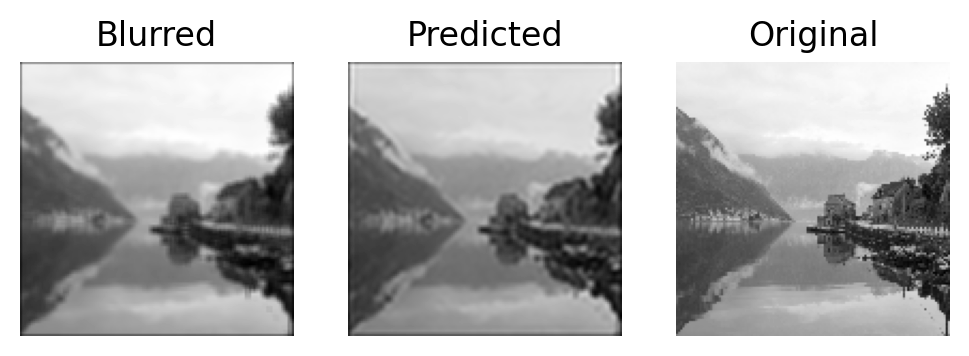

In [61]:
model = model.to("cpu")
model.eval()
X, y = next(iter(dataloader))

y_pred = model(X)

import random

plt.rcParams['figure.dpi'] = 200
# plt.figure(figsize=(40, 120))

i = random.randint(0, len(X)-1)

start = X.size(-1)//4
end = 3*start

plt.subplots(1, 3)

plt.subplot(1, 3, 1)
plt.imshow(X[i,0,:,:], cmap='gray')
plt.axis('off')
plt.title('Blurred')

plt.subplot(1, 3, 2)
plt.imshow(y_pred[i,0,:,:].detach().numpy(), cmap='gray')
plt.axis('off')
plt.title('Predicted')

plt.subplot(1, 3, 3)
plt.imshow(y[i,0,:,:], cmap='gray')
plt.axis('off')
plt.title('Original')

In [62]:
model.deconv.w_flat, model.w

(Parameter containing:
 tensor([-0.1122,  0.0659,  0.0079, -0.1131, -0.0816,  0.0535, -0.0048,  0.0444,
          0.0343,  0.0424, -0.0174,  0.0175,  0.0009, -0.0064, -0.0369],
        requires_grad=True), Parameter containing:
 tensor([0.6455], requires_grad=True))

Text(0, 0.5, 'Mean Square Error')

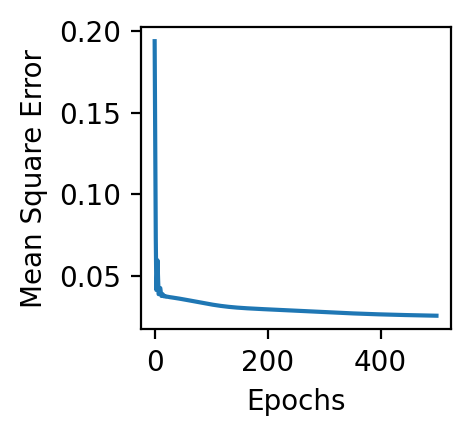

In [63]:
plt.figure(figsize=(2, 2))
plt.plot(history[0]['loss'])
plt.xlabel('Epochs')
plt.ylabel('Mean Square Error')